In [1]:
import sys

sys.path.append('/raid1/sc845/Tomographic_models/LMClust/')
import LMClust_g6_ryb

sys.path.append('/raid1/sc845/Tomographic_models/')
import basemap_circle


import obspy
from obspy import read
from obspy.core import Stream
import obspy.signal
import matplotlib.pyplot as plt
import os.path
import glob
import numpy as np
import scipy
import mpl_toolkits
import mpl_toolkits.basemap
print(mpl_toolkits.basemap.__path__)
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import addcyclic
import matplotlib.image as mpimg
import matplotlib.cm as cm
import subprocess
from matplotlib.colors import LinearSegmentedColormap
from geographiclib.geodesic import Geodesic
from obspy.imaging.beachball import beach
from obspy import read_events

import pandas as pd
from obspy.geodetics import degrees2kilometers
from obspy.geodetics import kilometers2degrees

['/home/zhi/anaconda3/lib/python3.8/site-packages/mpl_toolkits/basemap']


In [3]:
StationCatalog = dict()
StationCatalog['StationName'] = []
StationCatalog['NetworkCode'] = []
StationCatalog['StationCode'] = []
StationCatalog['Channel'] = []
StationCatalog['Latitude'] = []
StationCatalog['Longitude'] = []


with open("../Data/fetch_fdsn_sxd/station.meta", 'r') as f:
    for line in f:
        StationName = line.split('|')[0] + '.' + line.split('|')[1]
        StationCatalog['StationName'].append(StationName)
        StationCatalog['NetworkCode'].append(line.split('|')[0])
        StationCatalog['StationCode'].append(line.split('|')[1])
        StationCatalog['Channel'].append(line.split('|')[3])
        StationCatalog['Latitude'].append(float(line.split('|')[4]))
        StationCatalog['Longitude'].append(float(line.split('|')[5]))

df = pd.DataFrame(data=StationCatalog)
df

,StationName,NetworkCode,StationCode,Channel,Latitude,Longitude
0,AH.ANQ,AH,ANQ,BHZ,30.58,117.02
1,AH.ANQ,AH,ANQ,BHN,30.58,117.02
2,AH.ANQ,AH,ANQ,BHE,30.58,117.02
3,AH.BAS,AH,BAS,BHZ,31.47,117.38
4,AH.BAS,AH,BAS,BHN,31.47,117.38
...,...,...,...,...,...,...
4534,XJ.MNBL,XJ,MNBL,BHN,37.69,85.98
4535,XJ.MNBL,XJ,MNBL,BHE,37.69,85.98
4536,XJ.XQG,XJ,XQG,BHZ,42.09,86.02
4537,XJ.XQG,XJ,XQG,BHN,42.09,86.02


/tmp/ipykernel_2026935/300603309.py:46: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  m.scatter(SearchCenterLon,SearchCenterLat,latlon=True,
/home/zhi/anaconda3/lib/python3.8/site-packages/obspy/imaging/beachball.py:186: UserWarning: There is a known bug when plotting semi-transparent patches for non-DC sources, which leads to blending of pressure and tension color, see issue #1464.
  warnings.warn(msg)
/home/zhi/anaconda3/lib/python3.8/site-packages/obspy/imaging/beachball.py:186: UserWarning: There is a known bug when plotting semi-transparent patches for non-DC sources, which leads to blending of pressure and tension color, see issue #1464.
  warnings.warn(msg)
/home/zhi/anaconda3/lib/python3.8/site-packages/obspy/imaging/beachball.py:186: UserWarning: There is a known bug when plotting semi-transparent patches for non-DC sources, which lea

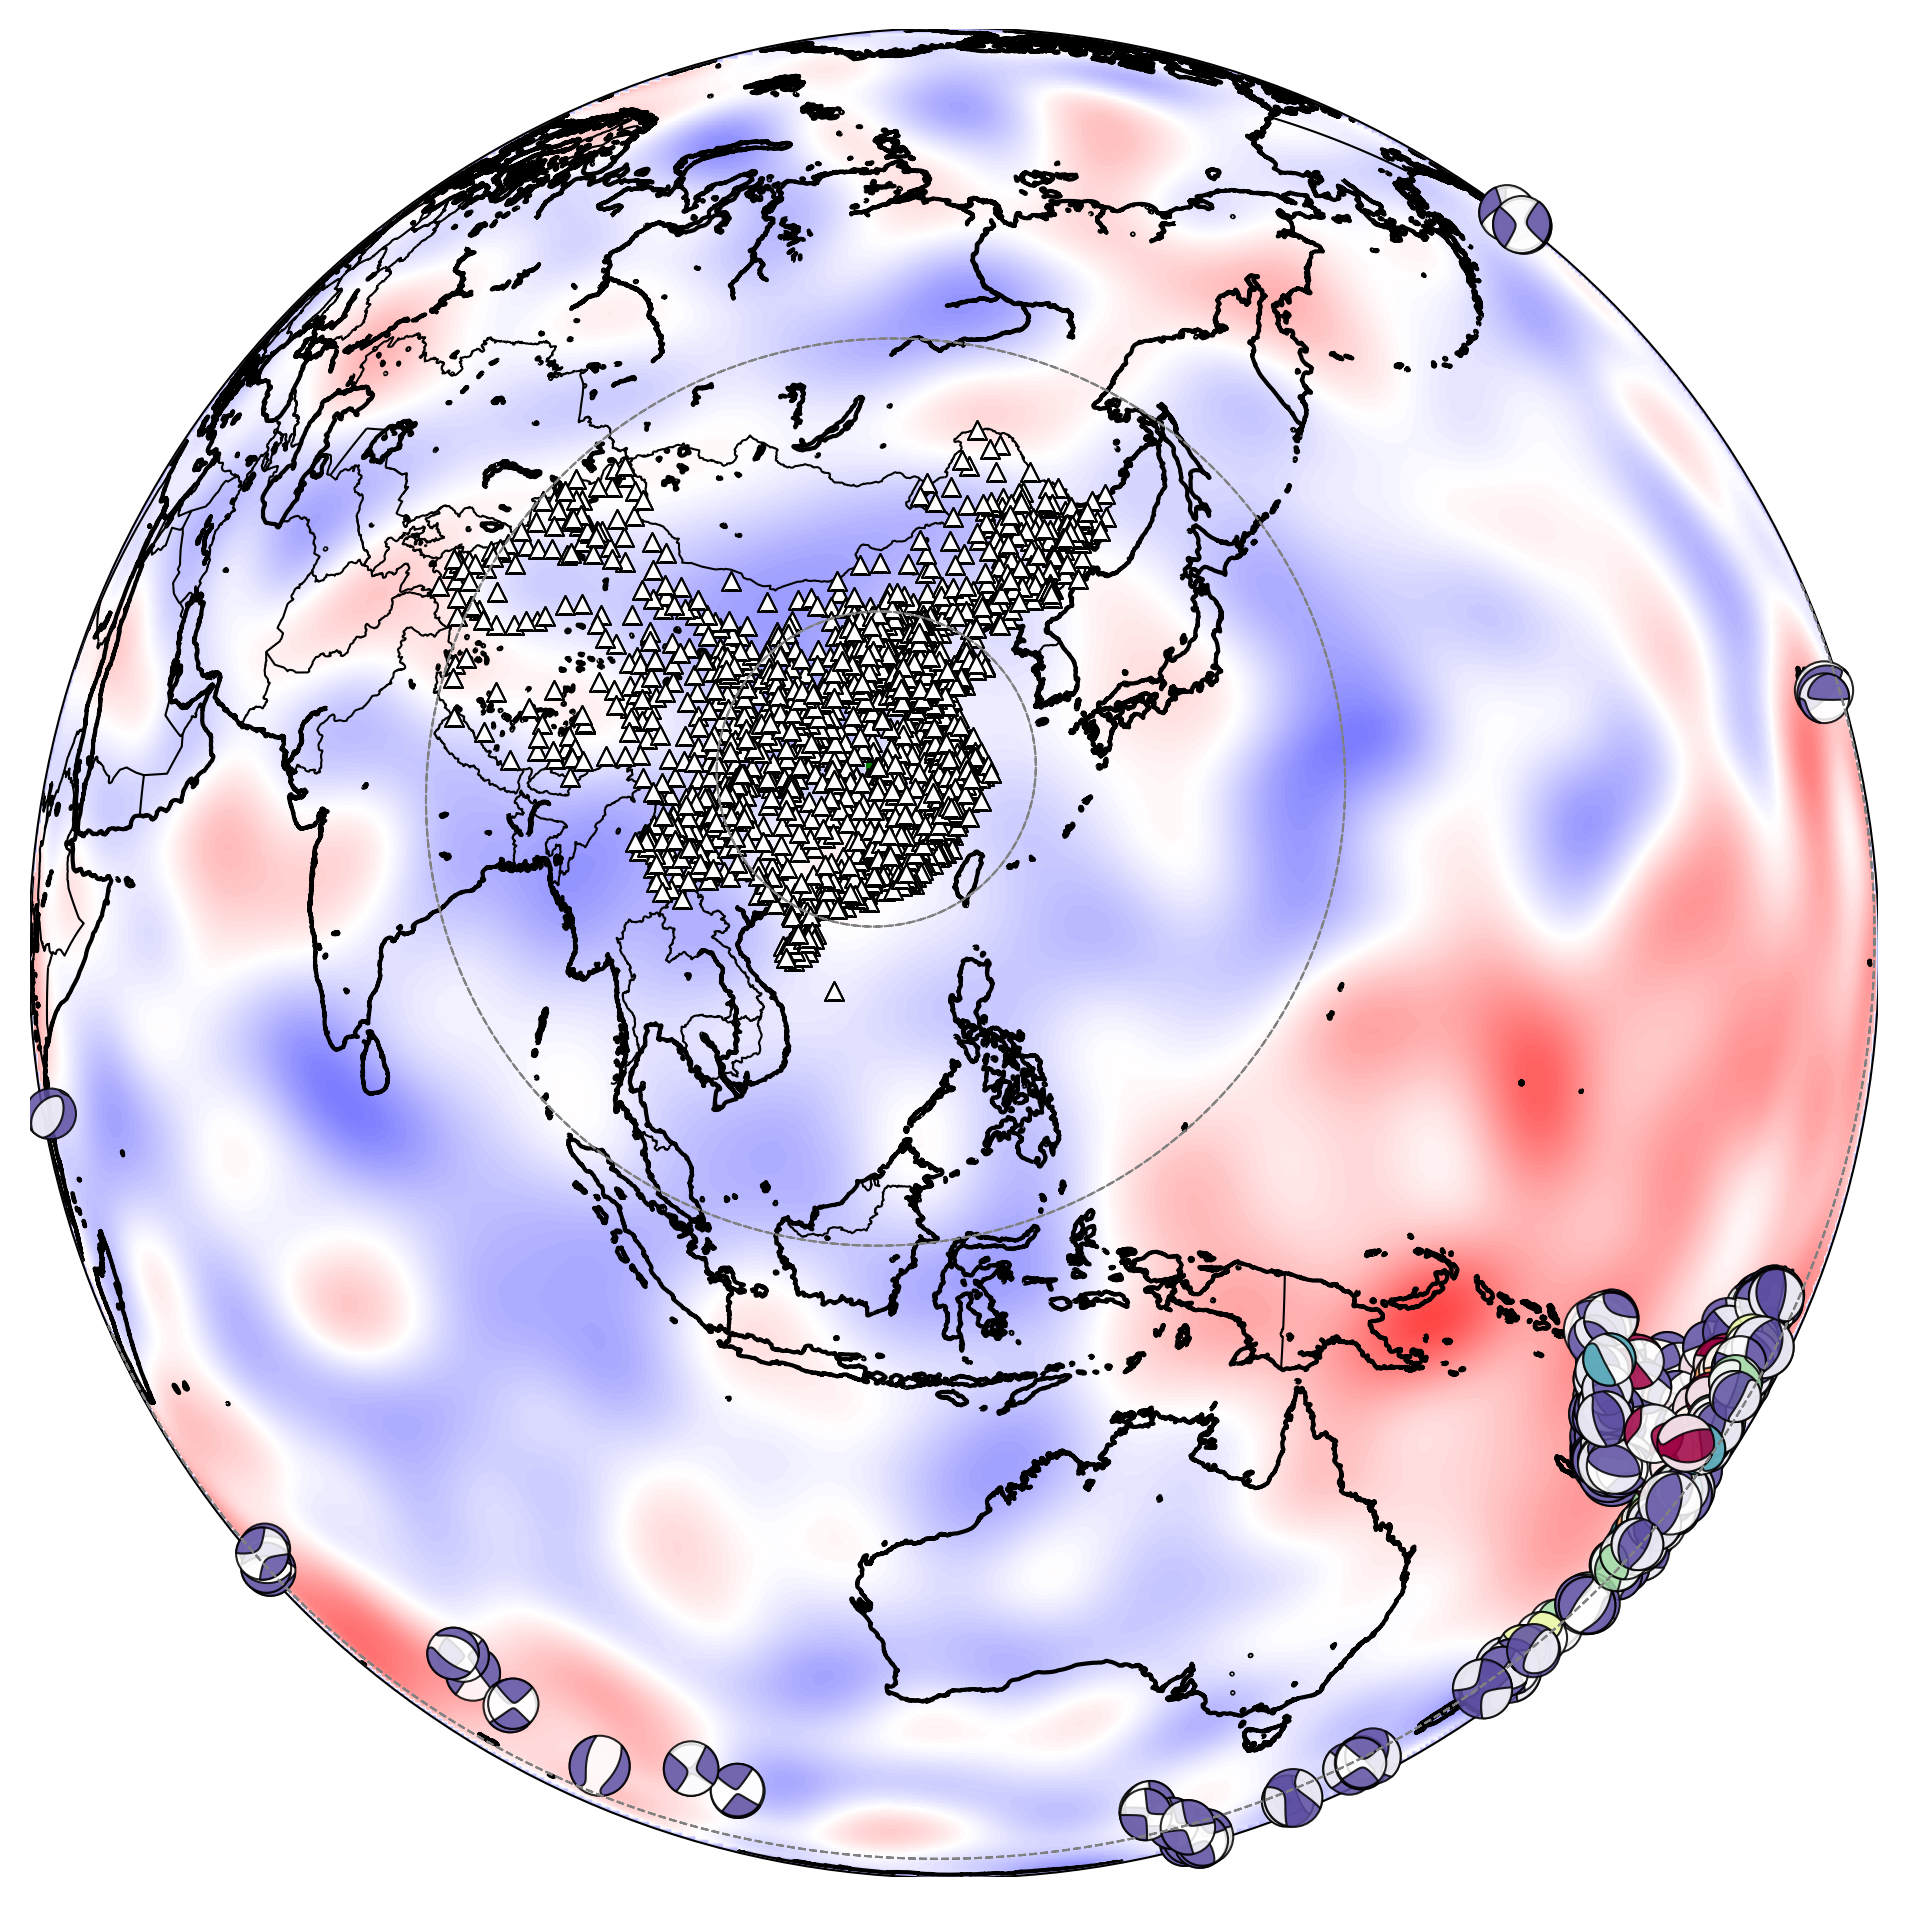

In [7]:
dpi = 300
fig = plt.figure(dpi=dpi,figsize=(8, 8))
ax = fig.add_subplot(111)

LMC=LMClust_g6_ryb.LMClust()
# LMC.read('/raid1/sc845/Tomographic_models/LMClust/','clustgr.txt')
# RGB_light =LinearSegmentedColormap.from_list('rgbmap', LMC.colors/2.+0.5,N=len(LMC.colors))
jet=cm.get_cmap('jet',12)
jet_vals=jet(np.arange(12))+0.4
for i in range(np.shape(jet_vals)[0]):
    for j in range(np.shape(jet_vals)[1]):
        if jet_vals[i,j]>1.:
            jet_vals[i,j]=1.

m = Basemap(projection='ortho',lat_0=19,lon_0=120,resolution='i')
# m = Basemap(projection='ortho',lat_0=-19,lon_0=120-180,resolution='i')

#m = Basemap(llcrnrlon=lonmin,llcrnrlat=latmin,urcrnrlon=lonmax,urcrnrlat=latmax#,
#                resolution='i',projection='merc',lon_0=27.,lat_0=46.7)
clip_path = m.drawmapboundary()


#m.contour(x,y,layer,cmap=RGB_light,linewidth=0,rasterized=True)   

tmp = np.loadtxt('../Data/BGPlottingData/SEMUCB_WM1_2800km.dat')
lon = tmp[:,1].reshape((181,361))
lat = tmp[:,2].reshape((181,361))
dvs = tmp[:,3].reshape((181,361))  
s = m.transform_scalar(dvs, lon[0,:], lat[:,0], 1000, 500)
im = m.imshow(s, cmap=plt.cm.seismic_r, clip_path=clip_path, vmin=-10, vmax=10)
# cb = plt.colorbar()
# cb.set_label('dlnVs (%)')
# # cb.set_clim(-10,10)
# cb.remove()
x,y=m(lon,lat)

#m.shadedrelief()
m.drawcoastlines()
m.drawcountries()


m.scatter(df['Longitude'].values,df['Latitude'].values,latlon=True,
    s=20,color='white',marker='^',alpha=1,edgecolors='k', linewidths=0.5,zorder=20)

SearchCenterLat, SearchCenterLon = 30.5928, 114.3052
m.scatter(SearchCenterLon,SearchCenterLat,latlon=True,
    s=20,c='g',marker='+',alpha=1,edgecolors='k')

MinRadius = 10
MaxRadius = 30
basemap_circle.equi(m, SearchCenterLon, SearchCenterLat, degrees2kilometers(MinRadius),lw=0.5,color='grey',linestyle='--',zorder=400)
basemap_circle.equi(m, SearchCenterLon, SearchCenterLat, degrees2kilometers(MaxRadius),lw=0.5,color='grey',linestyle='--',zorder=400)
basemap_circle.equi(m, SearchCenterLon, SearchCenterLat, degrees2kilometers(90),lw=0.5,color='grey',linestyle='--',zorder=400)


# Define the Sources colormap
Spectral = cm.get_cmap('Spectral',8).reversed()

CMTcatList = glob.glob('../Data/CMTSOLUTION/*.CMTSOLUTION')
for CMTcatPath in CMTcatList:

    CMTcat = read_events(CMTcatPath)

    emagtype = CMTcat[0].magnitudes[0].magnitude_type
    emag = CMTcat[0].magnitudes[0].mag
    elat = CMTcat[0].origins[0].latitude
    elon = CMTcat[0].origins[0].longitude
    edepth = CMTcat[0].origins[0].depth/1000
    slat, slon = SearchCenterLat, SearchCenterLon
    mt = CMTcat[0].focal_mechanisms[0].moment_tensor.tensor
    fm = [mt.m_rr, mt.m_tt,mt.m_pp,mt.m_rt,mt.m_rp,mt.m_tp]

    x,y = m(elon,elat)

    color = Spectral(edepth/600)
    ballsize = emag/6.0*350000
    beachball = beach(fm, linewidth=0.5, facecolor=color, bgcolor='w', edgecolor='k', alpha=0.85, 
            xy=(x, y), width=ballsize, size=100, nofill=False, zorder=10, axes=None)
    ax = plt.gca()
    ax.add_collection(beachball)

# plt.savefig("../Figure/ChinaArrayFront.png")
# plt.savefig("../Figure/ChinaArrayBack.png")

In [10]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib.collections import PathCollection
from matplotlib.path import Path

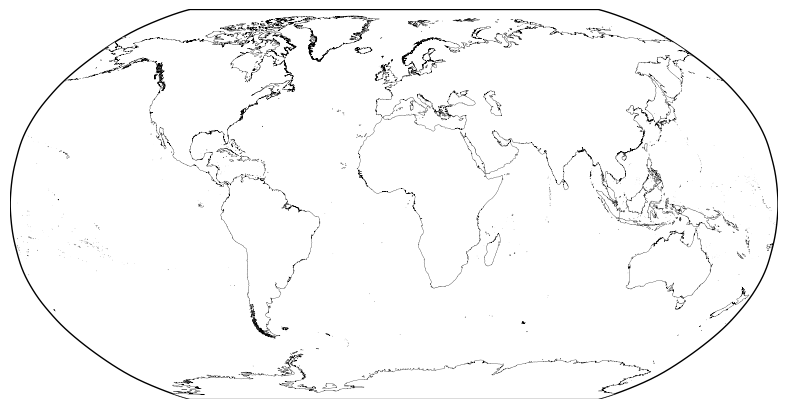

In [58]:
fig = plt.figure(figsize=(8, 4.5))
plt.subplots_adjust(left=0.02, right=0.98, top=0.98, bottom=0.00)

# MPL searches for ne_10m_land.shp in the directory 'D:\\ne_10m_land'
m = Basemap(projection='robin',lon_0=0,resolution='c')
shp_info = m.readshapefile('../Data/ne_10m_land/ne_10m_land', 'scalerank', drawbounds=True)
# shp_info = m.readshapefile('../Data/ne_10m_coastline/ne_10m_coastline', 'scalerank', drawbounds=True)
ax = plt.gca()
ax = plt.gca()
ax.cla()

paths = []
for line in shp_info[4]._paths:
    paths.append(Path(line.vertices, codes=line.codes))

coll = PathCollection(paths, linewidths=0.2, facecolors='white', edgecolor='k', zorder=200)

m = Basemap(projection='robin',lon_0=0,resolution='c')
# drawing something seems necessary to 'initiate' the map properly
m.drawcoastlines(color='white', zorder=0)

ax = plt.gca()
ax.add_collection(coll)

# plt.savefig('world.png',dpi=75)